<a href="https://colab.research.google.com/github/shreya1110-dev/EdibleDigest/blob/colab/Edible%20Digest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing files from drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
import os
import hashlib
import base64
import PIL
import math
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from PIL import Image
from io import BytesIO
from IPython.display import display

EVALUATING HASH USING SHALIB HASH (APPROACH 1)


In [ ]:
# create hashlib hash
def shahash(s):
    hash_text = hashlib.sha256(s).hexdigest()
    return str(hash_text)

EVALUATING USING DHASH (APPROACH 2)

In [ ]:
# Differential hashing - returns a hash value
def dhash(img):
  X = 16
  image = cv2.resize(img, (16,16), interpolation = cv2.INTER_CUBIC)
  dhash_str = ''
  for i in range(image.shape[0]):
    for j in range(image.shape[1]-1):
      if image[i, j] > image[i, j + 1]:
        dhash_str = dhash_str + '1'
      else:
        dhash_str = dhash_str + '0'
  result = ''
  for i in range(0, image.shape[0]*(image.shape[1]-1), 1):
    result += ''.join('%x' % int(dhash_str[i: i + 1], 2))
  return result

In [ ]:
# returns distance values
def camphash(hash_b1, hash_b2):
  n = 0
  for i in range(len(hash_b1)):
    if hash_b1[i] == hash_b2[i]:
      pass
    else:
      n = n + 1
  return n

EVALUATING THE PERFORMANCE METRICS


**IDEAL VALUES**

Uniformity - around 0.5<br>

Mean - around 0.5<br>
Standard Deviation - 0.034 <br>

Distribution center - should be close to mean <br>
Hamming Distance - should look like a bell-graph <br>


In [ ]:
# convert hexadecimal to binary
def htob(str):
  dict = {'0':'0000','1':'0001','2':'0010','3':'0011','4':'0100','5':'0101','6':'0110','7':'0111','8':'1000','9':'1001','a':'1010','b':'1011','c':'1100','d':'1101','e':'1110','f':'1111'}
  r = ''
  for x in str:
    r += dict[x]
  return r

In [ ]:
# binary to decimal
def binaryToDecimal(binary):   
    binary1 = binary
    decimal, i, n = 0, 0, 0
    while(binary != 0):
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)
        binary = binary//10
        i += 1
    return decimal

In [ ]:
# decimal to hexadecimal
conversion_table = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4',
                    5: '5', 6: '6', 7: '7',
                    8: '8', 9: '9', 10: 'a', 11: 'b', 12: 'c',
                    13: 'd', 14: 'e', 15: 'f'}
                    
def decimalToHexadecimal(decimal):
    hexadecimal = ''
    while(decimal > 0):
        remainder = decimal % 16
        hexadecimal = conversion_table[remainder] + hexadecimal
        decimal = decimal // 16
    return hexadecimal

In [ ]:
def bintohexa(binary):
  decimal = binaryToDecimal(binary)
  return decimalToHexadecimal(decimal)

In [ ]:
# uniformity
def uniformity(str1):
  s = 0
  c = 0
  for x in str1:
    c += 1
    if(x == '0'):
      continue
    else:
      s += 1
  return s/c

In [ ]:
# randomness 
def randomness(str):
  sn = 0
  c = 0
  for x in str:
    c += 1
    if(x == '0'):
      sn -= 1
    else:
      sn += 1
  so = abs(sn)/math.sqrt(c)

  return math.erfc(so/(math.sqrt(2)))

In [ ]:
# calculate Hamming Distance
def HammingDistance(str1, str2):
  s = 0
  for i in range(0,len(str1)):
    if(str1[i] != str2[i]):
      s += 1
    else:
      s = s
  return s

In [ ]:
# calculating uniqueness
def Uniqueness(hashArray):
  hammingDistanceValues = []
  sumVar = 0
  for i in range(len(hashArray)):
    for j in range(0,len(hashArray)):
      a = hashArray[i]
      b = hashArray[j]
      hammingDistanceValues.append(HammingDistance(a,b)/256)
      sumVar += (HammingDistance(a,b)/256)
  
  s = len(hashArray)
  mult = (2/(s*(s-1)))

  return {
      "Uniqueness": mult*sumVar,
      "Hamming Distance Values": hammingDistanceValues
      }

In [ ]:
# to evaluate average uniformity average, randomness average
def evaluate_metrics(hashtype, hashDigest):
  uniformityValues = []
  randomnessValues = []
  sumUniformity = 0
  sumRandomness = 0

  for x in hashDigest:
    if(hashtype == 'hashlib'):
      xBinary = htob(x)
    else:
      xBinary = x
    uniformityValues.append(uniformity(xBinary))
    randomnessValues.append(randomness(xBinary))
    sumUniformity += uniformity(xBinary)
    sumRandomness += randomness(xBinary)

  sumUniformity /= len(hashDigest)
  sumRandomness /= len(hashDigest)

  uniqueness_results = Uniqueness(hashDigest)

  return {
      "Uniformity Average": sumUniformity,
      "Randomness Average": sumRandomness,
      "Uniqueness Average": uniqueness_results['Uniqueness'],
      "Uniformity Values": uniformityValues,
      "Randomness Values": randomnessValues,
      "Hamming Distance Values": uniqueness_results['Hamming Distance Values']
  }

In [ ]:
def print_results(results):
  for (k,v) in results.items():
    print(k,":",v)

ANALYSING AND PLOTTING RESULTS

In [ ]:
# mean, median and std deviation of Hamming distance values
def plot_results(evaluation_results, name):
  print("\n\nResult metrics")
  data = np.array(evaluation_results['Hamming Distance Values'])
  print("Mean", np.mean(data))
  print("Median", np.median(data))
  print("Standard Deviation:", np.std(data))
    
  # Plotting the histogram for Hamming distance values.
  plt.hist(data, bins=100, density=True, alpha=0.6, color='b')
  plt.show()
  figure = plt.savefig('/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /'+ name +'_hamming_plot.png')

COLOUR CODES

In [ ]:
# obtaining hashes and color coding them
def generate_color_codes(hashArray, images, name, htype):
  print("\n\n Color codes")
  for i in range(len(hashArray)):
    hash = hashArray[i]
    if htype != 'sha':
      j=0
      while(hash[j] == '0'):
        j=j+1
      hash = hash+ '0000000000000000'
      if(j>3):
        hash = str(0)*(j//4)+bintohexa(int(hash))
      else:
        hash = bintohexa(int(hash))
    hash_arr = np.array([int(x, 16) for x in hash])
    reshaped = hash_arr.reshape(8,8)
    hm = sns.heatmap(data = reshaped)
    # displaying the plotted heatmap
    plt.show()
    figure = hm.get_figure()
    print(images[i])
    figure.savefig('/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /ColorCodes/'+ name +'/'+images[i].split('/')[-1]+'.png')

In [ ]:
# generate hamming distance heatplot
def hamming_heatplot(evaluation_results, name, x):
  print("\n\nHamming distance heatplot")
  hamming_distance_values = np.array([x for x in evaluation_results['Hamming Distance Values']])
  reshaped = hamming_distance_values.reshape(x,x)
  hm = sns.heatmap(data = reshaped)
  # displaying the plotted heatmap
  plt.show()
  plot = hm.get_figure()
  plot.savefig('/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Heatmap-hamming distance/'+name+'.png')

In [ ]:
# saving metrics to csv
def metrics_csv(evaluation_results, name):
  metrics = ['Uniformity Values', 'Hamming Distance Values', 'Randomness Values']
  for metric in metrics:
    df = pd.DataFrame(evaluation_results, columns=[metric])
    df.to_csv('/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Results/'+name+'/'+metric+'.csv')
  print("Converted metrics to csv")

In [ ]:
# saving hash comparison to csv
def hash_comp_csv(dhash_results, name):
  df = pd.DataFrame(dhash_results['Dataframe'], columns = ["image1", "image2", "dhash_distance", "dhash_similarity"])
  df.to_csv('/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Results/'+name+'/Dhash_metrics_comparison.csv')
  print("Converted hash comparison to csv")

In [ ]:
# saving hash details to csv
def hash_csv(hashes, name):
  df = pd.DataFrame(hashes, columns = ["Hashes"])
  df.to_csv('/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Results/'+name+'/Hash_values.csv')
  print("Converted hashes to csv")

OBTAIN IMAGES

In [ ]:
# adding images to path from many directories
def add_image_paths_from_directories(directories):
  images = []
  for directory in directories:
    print(directory)
    for filename in os.listdir(directory):
      f = os.path.join(directory, filename)
      # checking if it is a file
      if os.path.isfile(f):
          images.append(f)
  return images

In [ ]:
# adding images to path from single directory
def add_image_paths_from_directory(directory):
  images = []
  for filename in os.listdir(directory):
      f = os.path.join(directory, filename)
      # checking if it is a file
      if os.path.isfile(f):
          images.append(f)
  return images

BASIC IMAGE OPERATIONS




In [ ]:
# reading images to grayscale
def grayscale_images(images):
  grayscale = []
  for img in images:
    image = cv2.imread(img)
    image_grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    grayscale.append(image_grayscale)
  return grayscale

In [ ]:
# normalizing the images
def normalize(images):
  normalised = []
  for in_img in images:
    img = cv2.imread(in_img, 0)
    equ = cv2.equalizeHist(img)
    normalised.append(np.hstack((img, equ)))
  return normalised

In [ ]:
# computing hashes
def compute_hash(type, grayscale_images):
  hashes = []
  if(type == 'sha'):
    for img in grayscale_images:
      hashes.append(shahash(img))
  elif(type == 'dhash'):
    for img in grayscale_images:
      hashes.append(dhash(img))
  else:
    print("Invalid")
  return hashes

STANDARD WORKFLOW OUTPUTS

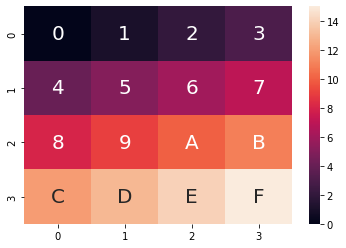

In [ ]:
# sample color code for hamming distance
hamming_distance_values = np.array([x for x in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]])
reshaped = hamming_distance_values.reshape(4,4)
labels = [[0,1,2,3],
          [4,5,6,7],
          [8,9,'A','B'],
          ['C','D','E','F']]
hm = sns.heatmap(data = reshaped, annot=labels, fmt = '', annot_kws={'size':20})
plt.show()

Original image


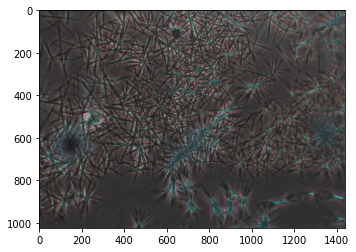

In [ ]:
# sample grayscale image
img = '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/1_20x (1).tif'
originalImage = cv2.imread(img)
print("Original image")
plt.imshow(originalImage)

Grayscale image


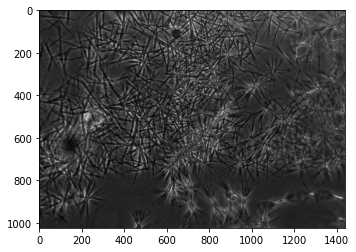

In [ ]:
img_grey = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
print("Grayscale image")
plt.imshow(img_grey, cmap='gray')

In [ ]:
# dhash code for the same image
hash = dhash(img_grey)
print("Binary hash", hash)
i=0
while(hash[i]=='0'):
  i=i+1
if i>3:
  print("Hexadecimal hash", str(0)*(i//4)+bintohexa(int(hash)))
else:
  print("Hexadecimal hash", bintohexa(int(hash)))

Binary hash 000001010101001100111010000110101101100011010011010010101001010110010010110001010001001011100110111001010101011001010010001100100100101101001101001110110100101100101010101101001010001110011100001011110110010100010001000010100010101111001110
Hexadecimal hash 05533a1ad8d34a9592c512e6e55652324b4d3b4b2ab4a39c2f65110a2bce


COMPLEX EVALUATIONS

In [ ]:
# comparing 2 sets of hashes
def compare_hash_sets(set1, set2, htype, X, name):
  dataframe_comparison = []

  set1_hashes = compute_hash(htype, set1)
  set2_hashes = compute_hash(htype, set2)
  p=0
  q=0
  for i in set1_hashes:
    for j in set2_hashes:
      camphash2 = camphash(i, j)
      sim2 = 1-(camphash2/(X**2))
      list1 = [p,q,str(camphash2), str(sim2)]
      q=q+1
      dataframe_comparison.append(list1)
    p=p+1
  
  hashes = list(set(set1_hashes).union(set(set2_hashes)))

  return {
        "Dataframe": dataframe_comparison,
        "Hashes": hashes
  }

IMPLEMENTING - COMPARISON DHASHES

In [ ]:
set1_folder_path = ['/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set1']
set2_folder_path = ['/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set2']
set1_image_paths = add_image_paths_from_directories(set1_folder_path)
set2_image_paths = add_image_paths_from_directories(set2_folder_path)
set1_grayscale_images = grayscale_images(set1_image_paths)
set2_grayscale_images = grayscale_images(set2_image_paths)

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set1
/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set2


Uniformity Average : 0.4979166666666666
Randomness Average : 0.7834898372343425
Uniqueness Average : 0.9546875
Uniformity Values : [0.5, 0.48333333333333334, 0.49166666666666664, 0.49166666666666664, 0.5041666666666667, 0.5166666666666667]
Randomness Values : [1.0, 0.6055766163353464, 0.7962534147376393, 0.7962534147376393, 0.8972789612600831, 0.6055766163353464]
Hamming Distance Values : [0.0, 0.484375, 0.5, 0.4765625, 0.48046875, 0.4921875, 0.484375, 0.0, 0.453125, 0.453125, 0.47265625, 0.484375, 0.5, 0.453125, 0.0, 0.53125, 0.47265625, 0.4921875, 0.4765625, 0.453125, 0.53125, 0.0, 0.48046875, 0.4609375, 0.48046875, 0.47265625, 0.47265625, 0.48046875, 0.0, 0.42578125, 0.4921875, 0.484375, 0.4921875, 0.4609375, 0.42578125, 0.0]


Result metrics
Mean 0.3977864583333333
Median 0.474609375
Standard Deviation: 0.17915952209894948


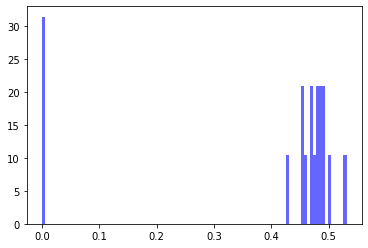

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set1
/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set2


 Color codes


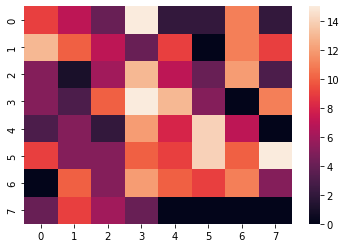

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set1/test2.tif


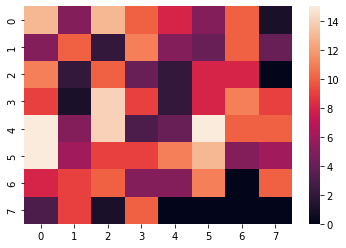

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set1/test3.tif


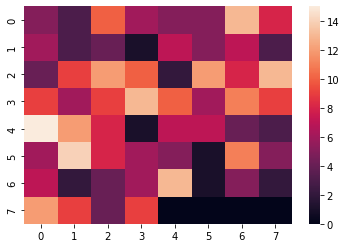

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set1/test1.tif


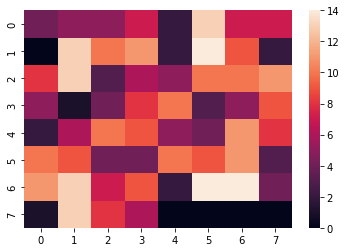

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set2/test1.tif


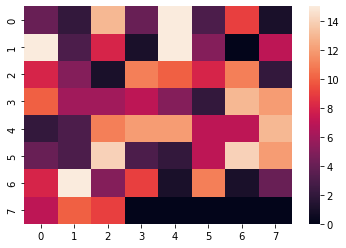

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set2/test3.tif


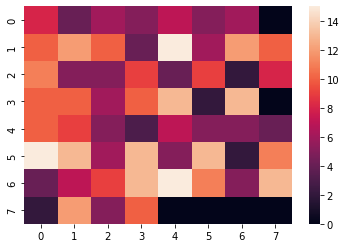

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set2/test2.tif


Hamming distance heatplot


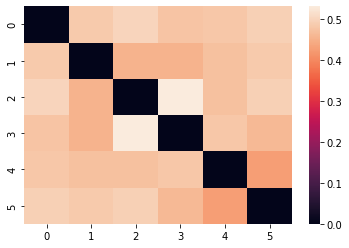

Converted metrics to csv
Converted hash comparison to csv


In [ ]:
hash_results = compare_hash_sets(set1_grayscale_images, set2_grayscale_images, 'dhash', 16, 'Compare dhashes')
evaluation_results = evaluate_metrics('dhash', hash_results['Hashes'])
print_results(evaluation_results)
plot_results(evaluation_results, 'compare dhashes')
images = add_image_paths_from_directories(['/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set1',
                                           '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set2'])
generate_color_codes(hash_results['Hashes'], images, 'Compare dhashes', 'dhash')
hamming_heatplot(evaluation_results, 'Compare dhashes', len(images))
metrics_csv(evaluation_results, 'Compare dhashes')
hash_comp_csv(hash_results, 'Compare dhashes')

IMPLEMENTING - MULTIPLE DIRECTORY DHASHES

In [ ]:
directories = [r'/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set1',
                r'/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set2']

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set1
/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set2
['/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set1/test2.tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set1/test3.tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set1/test1.tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set2/test1.tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set2/test3.tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set2/test2.tif']
Uniformity Average : 0.4979166666666666
Randomness Average : 0.7834898372343425
Uniqueness Average : 0.9546875
Uniformity Values : [0.49166666666666664, 0.49166666666666664, 0.5, 0.5166666666666667, 0.48333333333333334, 0.5041666666666667]
Randomnes

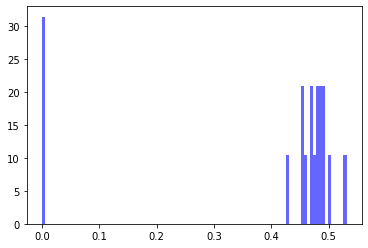



 Color codes


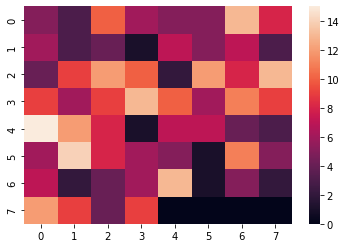

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set1/test2.tif


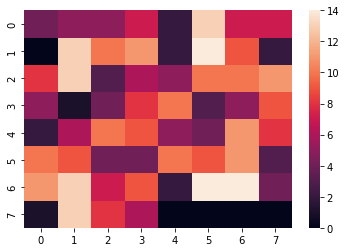

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set1/test3.tif


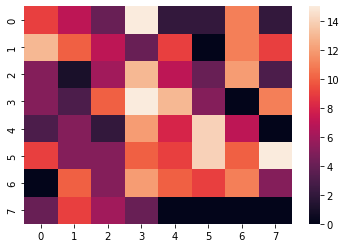

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set1/test1.tif


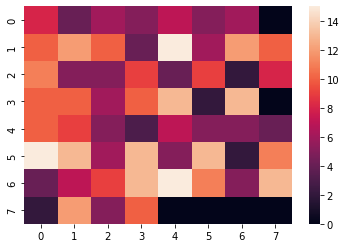

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set2/test1.tif


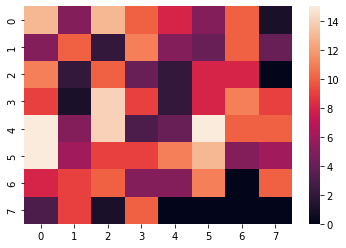

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set2/test3.tif


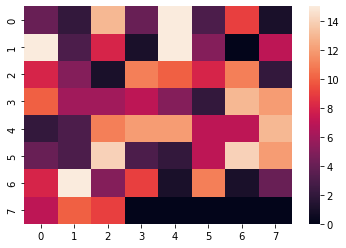

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /101022/Set2/test2.tif


Hamming distance heatplot


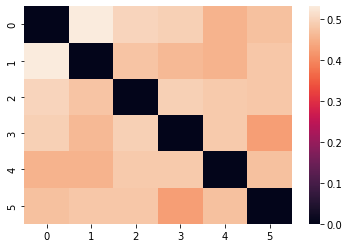

Converted metrics to csv
Converted hashes to csv


In [ ]:
images = add_image_paths_from_directories(directories)
print(images)
gs_images = grayscale_images(images)
hashes = compute_hash('dhash', gs_images)
evaluation_results = evaluate_metrics('dhash', hashes)
print_results(evaluation_results)
plot_results(evaluation_results, 'generate dhashes')
generate_color_codes(hashes, images, 'generate dhashes', 'dhash')
hamming_heatplot(evaluation_results, 'generate dhashes', len(images))
metrics_csv(evaluation_results, 'generate dhashes')
hash_csv(hashes, 'generate dhashes')

IMPLEMENTING - MULTIPLE DIRECTORY SHA HASHES

In [ ]:
directories = [r'/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x',
              r'/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/4x']

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x
/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/4x
['/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/28.tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/23.tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/31.tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/24.tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/3.tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/22.tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/20.tif', '/con

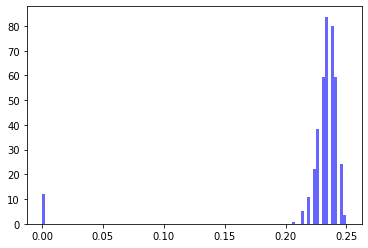



 Color codes


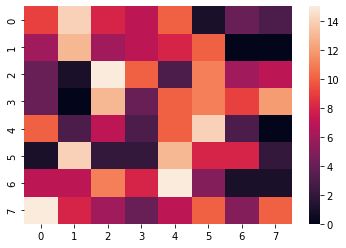

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/28.tif


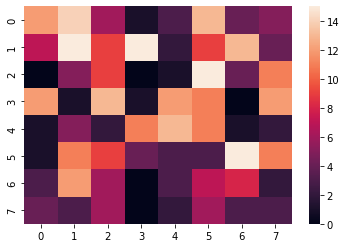

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/23.tif


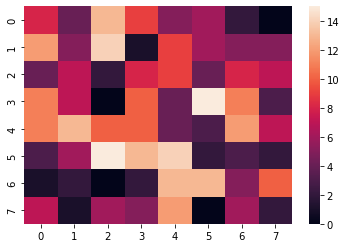

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/31.tif


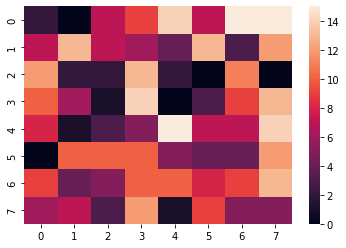

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/24.tif


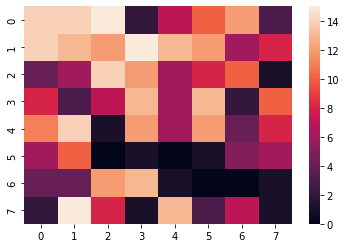

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/3.tif


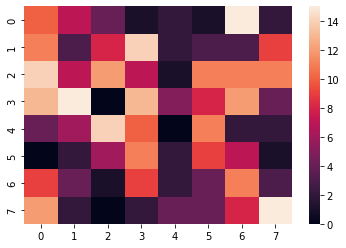

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/22.tif


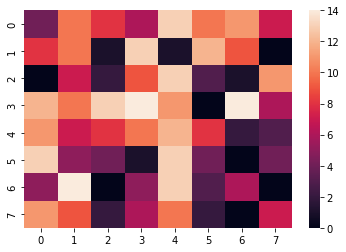

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/20.tif


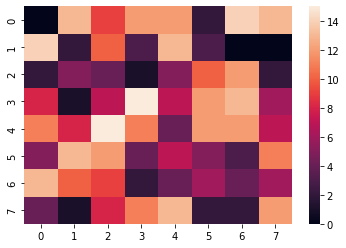

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/7.tif


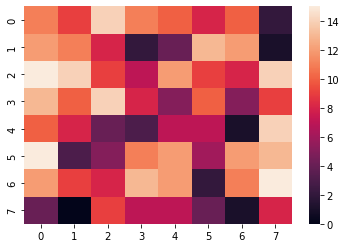

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/12.tif


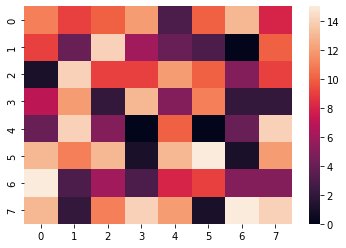

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/30.tif


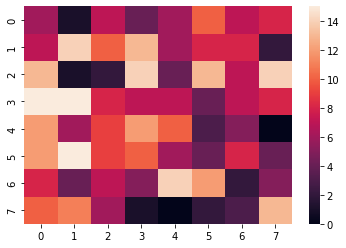

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/27.tif


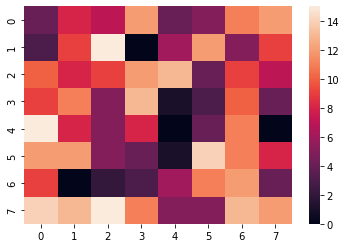

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/19.tif


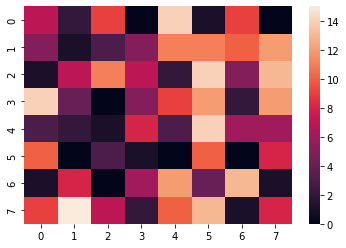

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/11.tif


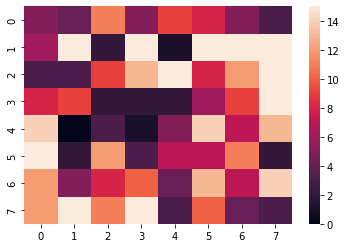

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/13.tif


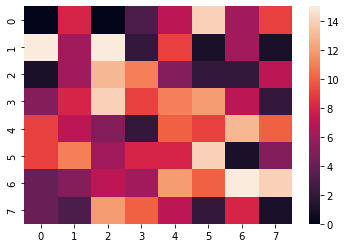

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/4.tif


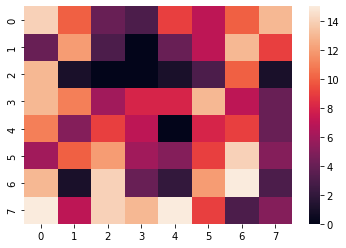

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/26.tif


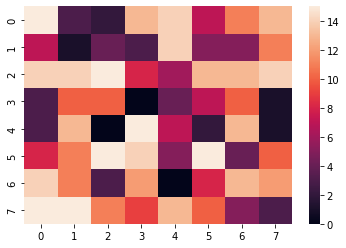

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/6.tif


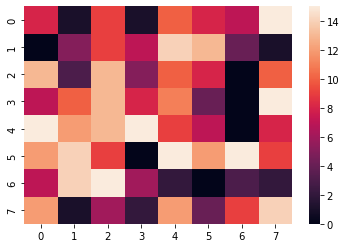

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/9.tif


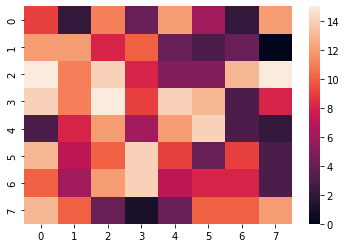

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/14.tif


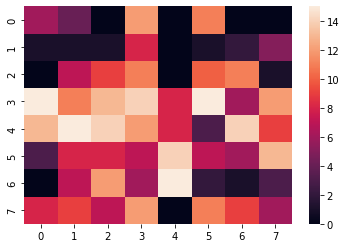

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/17.tif


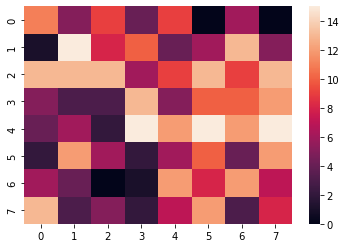

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/8.tif


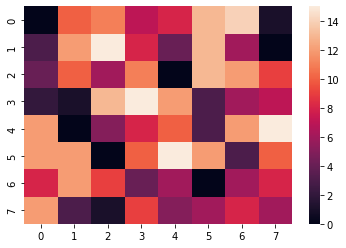

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/15.tif


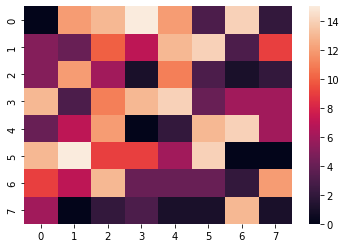

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/16.tif


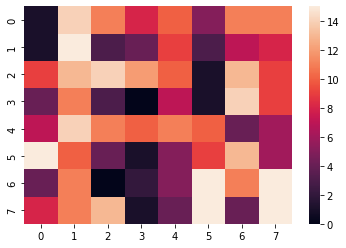

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/1_40.tif


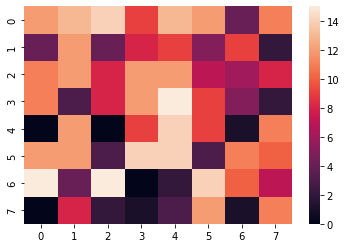

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/21.tif


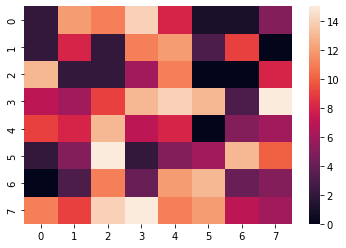

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/5_40.tif


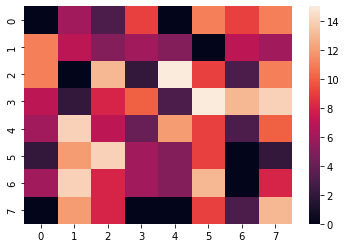

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/18.tif


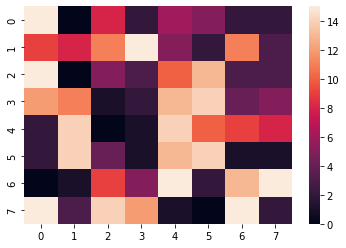

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/25.tif


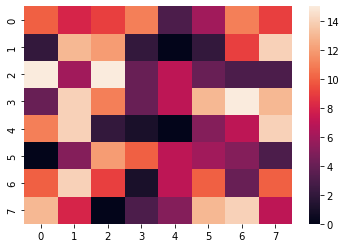

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/29.tif


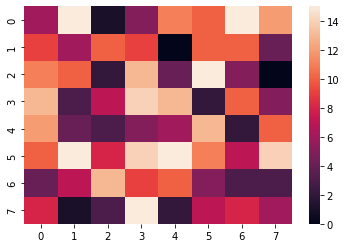

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/2.tif


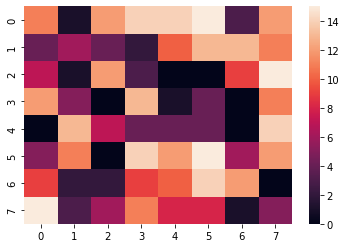

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/40 x/10.tif


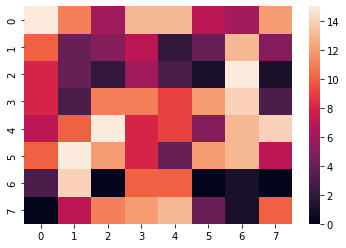

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/4x/2_glass.tif


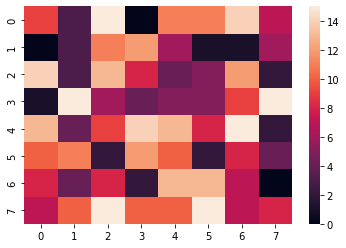

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Glass Slide images/220922/4x/1_glass.tif


Hamming distance heatplot


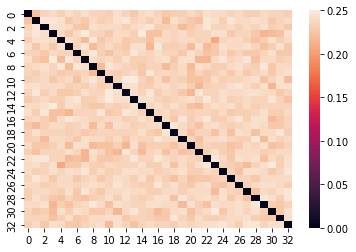

Converted metrics to csv
Converted hashes to csv


In [ ]:
images = add_image_paths_from_directories(directories)
print(images)
gs_images = grayscale_images(images)
hashes = compute_hash('sha', gs_images)
evaluation_results = evaluate_metrics('hashlib', hashes)
print_results(evaluation_results)
plot_results(evaluation_results, 'generate sha')
generate_color_codes(hashes, images, 'generate sha', 'sha')
hamming_heatplot(evaluation_results, 'generate sha', len(images))
metrics_csv(evaluation_results, 'generate sha')
hash_csv(hashes, 'generate sha')

IMPLEMENTING - DAYWISE IMAGES/STABILITY

In [ ]:
# STABILITY FOLDER (daywise comparison)
directory = r'/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Stability'

set1 = []
set2 = []
# reading and storing 2 sets of images
for filename in os.listdir(directory):
  f = os.path.join(directory, filename)
  if os.path.isfile(f):
    if filename == 'Day1.tif':
      set1.append(f)
    else:
      set2.append(f)
set1 = grayscale_images(set1)
set2 = grayscale_images(set2)

Uniformity Average : 0.5050925925925926
Randomness Average : 0.6276415706807583
Uniqueness Average : 0.9049479166666666
Uniformity Values : [0.475, 0.5083333333333333, 0.5041666666666667, 0.5083333333333333, 0.525, 0.4875, 0.5208333333333334, 0.4875, 0.5291666666666667]
Randomness Values : [0.4385780260809999, 0.7962534147376393, 0.8972789612600831, 0.7962534147376393, 0.4385780260809999, 0.6985353583033387, 0.5186050164287257, 0.6985353583033387, 0.3661565601940605]
Hamming Distance Values : [0.0, 0.4296875, 0.43359375, 0.5, 0.5, 0.43359375, 0.51171875, 0.51171875, 0.49609375, 0.4296875, 0.0, 0.47265625, 0.5, 0.421875, 0.47265625, 0.39453125, 0.47265625, 0.37109375, 0.43359375, 0.47265625, 0.0, 0.45703125, 0.43359375, 0.421875, 0.5, 0.5, 0.4609375, 0.5, 0.5, 0.45703125, 0.0, 0.46875, 0.42578125, 0.44140625, 0.45703125, 0.44140625, 0.5, 0.421875, 0.43359375, 0.46875, 0.0, 0.48046875, 0.44921875, 0.45703125, 0.44140625, 0.43359375, 0.47265625, 0.421875, 0.42578125, 0.48046875, 0.0, 0.43

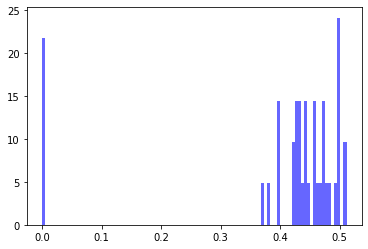



 Color codes


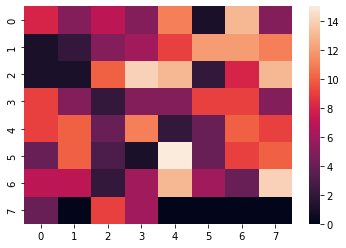

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Stability/Day1.tif


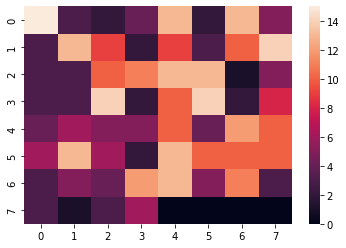

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Stability/Day8.tif


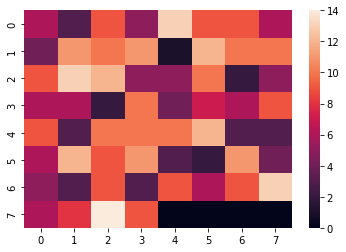

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Stability/Day4.tif


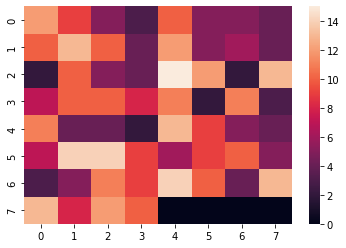

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Stability/Day2.tif


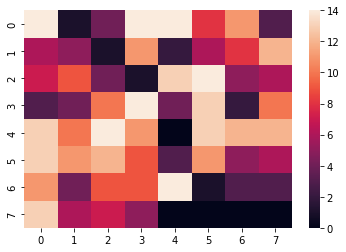

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Stability/Day7.tif


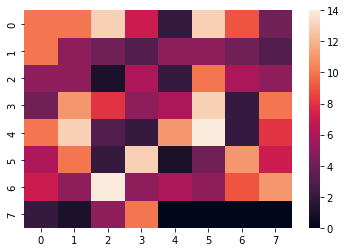

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Stability/Day5.tif


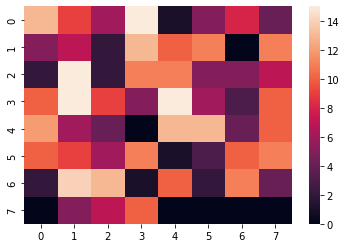

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Stability/Day6.tif


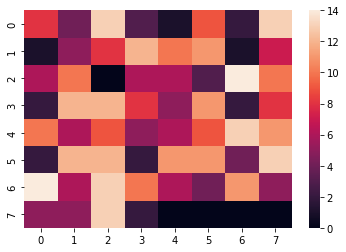

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Stability/Day3.tif


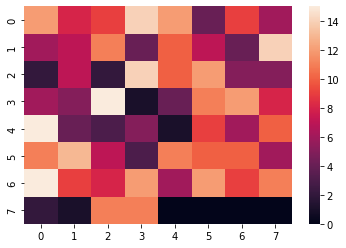

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Stability/Day9.tif


Hamming distance heatplot


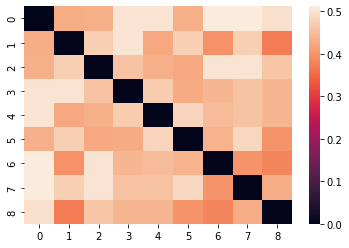

Converted metrics to csv
Converted hash comparison to csv


In [ ]:
hash_results = compare_hash_sets(set1, set2, 'dhash', 16, 'Compare daywise')
evaluation_results = evaluate_metrics('dhash', hash_results['Hashes'])
print_results(evaluation_results)
plot_results(evaluation_results, 'Compare daywise')
images = add_image_paths_from_directory('/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Stability')
generate_color_codes(hash_results['Hashes'], images, 'Compare daywise', 'dhash')
hamming_heatplot(evaluation_results, 'Compare daywise', len(images))
metrics_csv(evaluation_results, 'Compare daywise')
hash_comp_csv(hash_results, 'Compare daywise')

IMPLEMENTING RESULTS - 30 PUF IMAGES DHASH

In [ ]:
directories = [r'/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1',
               r'/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set2',
               r'/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3']

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1
/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set2
/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3
['/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/4_20x (1).tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/5_20x (1).tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/9_20x (1).tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/8_20x (1).tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/1_20x (1).tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/7_20x (1).tif', '/content/gdrive/MyDrive/Tyrosine-SA

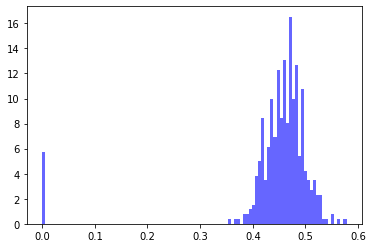



 Color codes


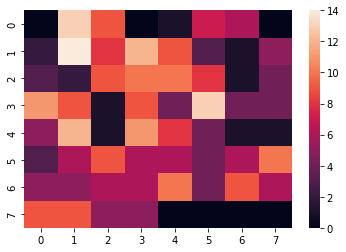

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/4_20x (1).tif


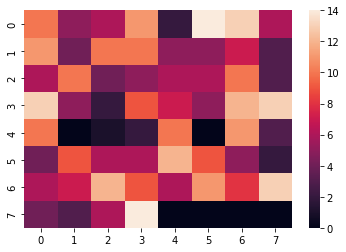

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/5_20x (1).tif


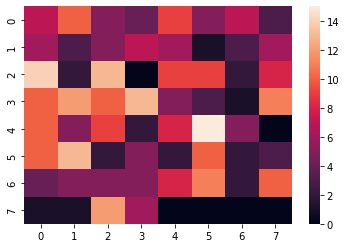

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/9_20x (1).tif


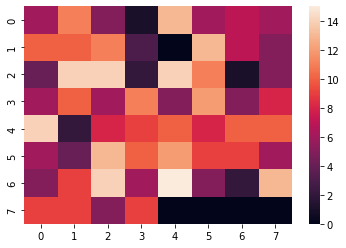

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/8_20x (1).tif


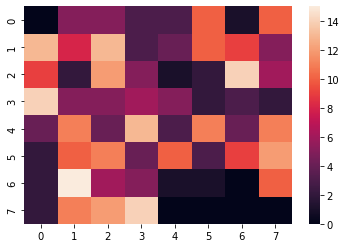

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/1_20x (1).tif


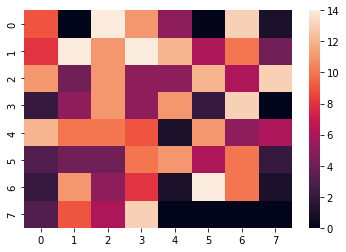

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/7_20x (1).tif


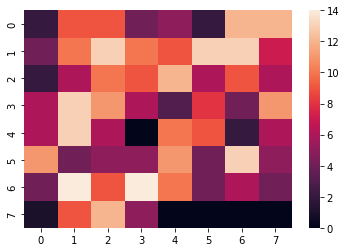

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/10_20x.tif


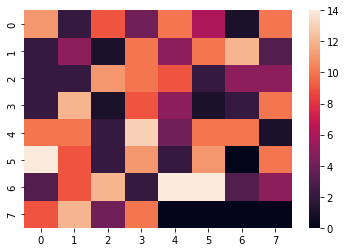

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/3_20x (1).tif


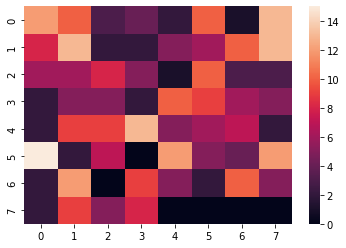

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/6_20x (1).tif


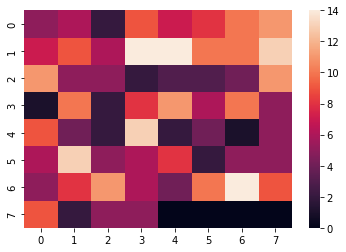

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/2_20x (1).tif


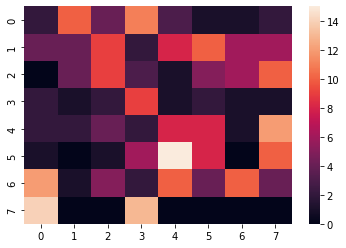

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set2/7_20x.tif


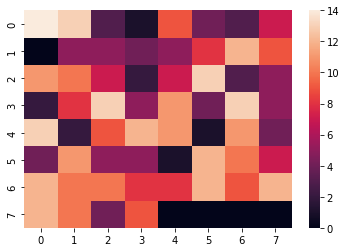

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set2/6_20x.tif


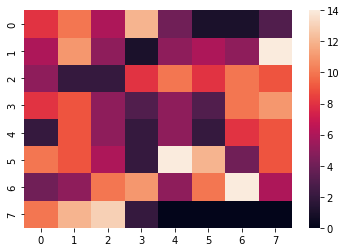

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set2/4_20x.tif


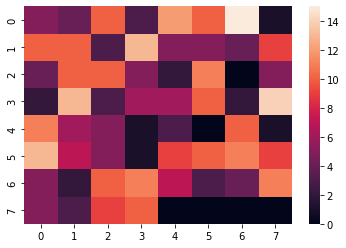

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set2/3_20x.tif


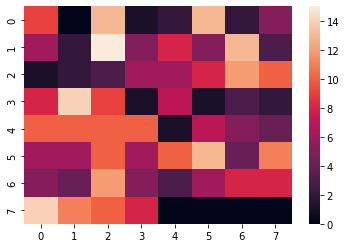

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set2/8_20x.tif


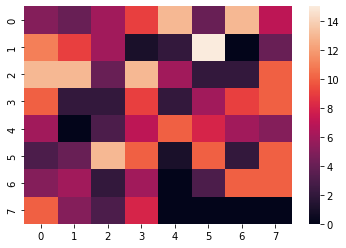

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set2/5_20x.tif


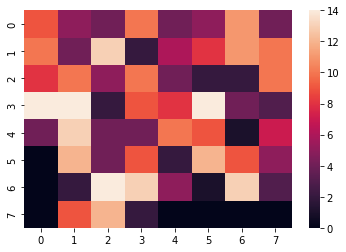

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set2/1_20x.tif


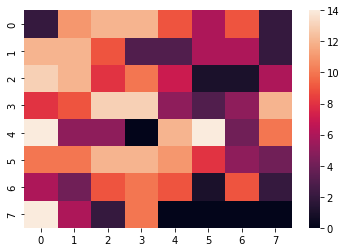

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set2/2_20x.tif


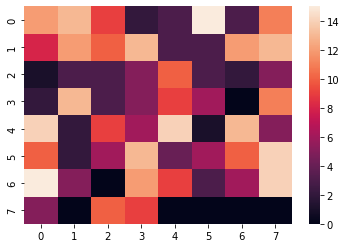

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set2/10_20x.tif


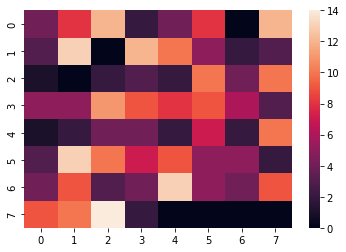

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set2/9_20x.tif


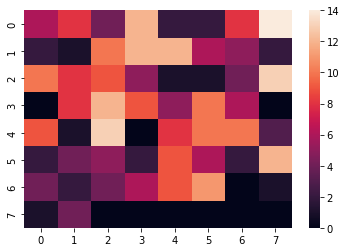

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3/5_20x.tif


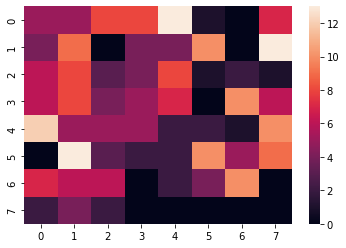

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3/8_20x.tif


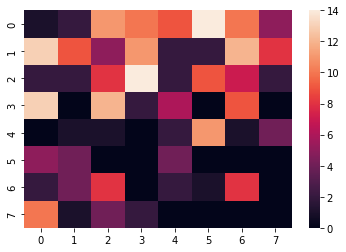

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3/10_20x.tif


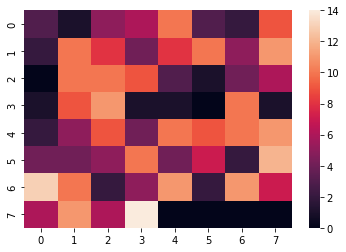

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3/6_20x.tif


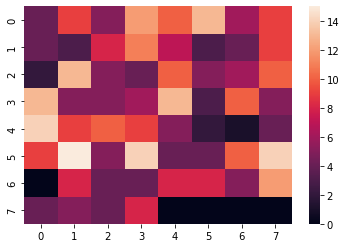

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3/3_20x.tif


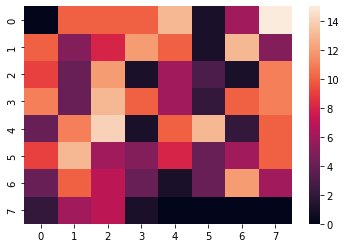

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3/7_20x.tif


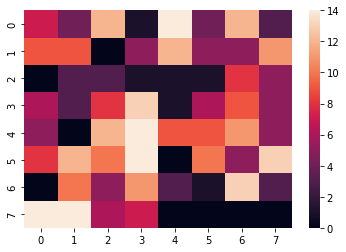

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3/9_20x.tif


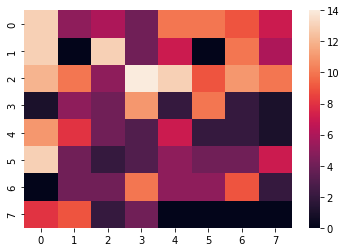

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3/4_20x.tif


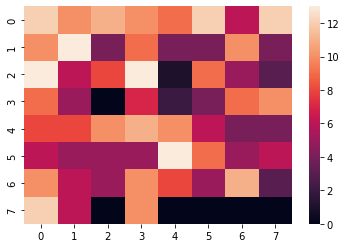

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3/2_20x.tif


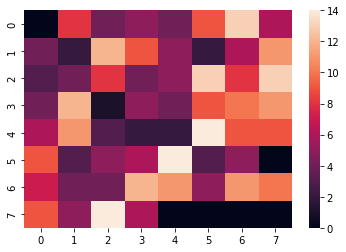

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3/1_20x.tif


Hamming distance heatplot


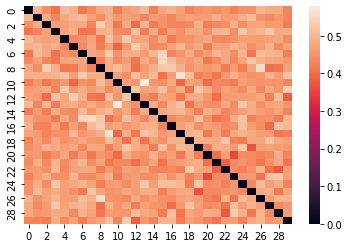

Converted metrics to csv
Converted hashes to csv


In [ ]:
images = add_image_paths_from_directories(directories)
print(images)
gs_images = grayscale_images(images)
hashes = compute_hash('dhash', gs_images)
evaluation_results = evaluate_metrics('dhash', hashes)
print_results(evaluation_results)
plot_results(evaluation_results, '30puf')
generate_color_codes(hashes, images, '30puf', 'dhash')
hamming_heatplot(evaluation_results, '30puf', len(images))
metrics_csv(evaluation_results, '30puf')
hash_csv(hashes, '30puf')

NORMALIZED 30PUF


In [ ]:
directories = [r'/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1',
               r'/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set2',
               r'/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3']

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1
/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set2
/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3
['/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/4_20x (1).tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/5_20x (1).tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/9_20x (1).tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/8_20x (1).tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/1_20x (1).tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/7_20x (1).tif', '/content/gdrive/MyDrive/Tyrosine-SA

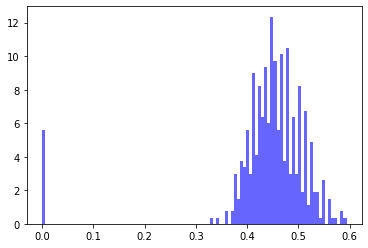



 Color codes


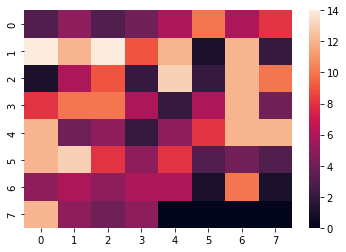

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/4_20x (1).tif


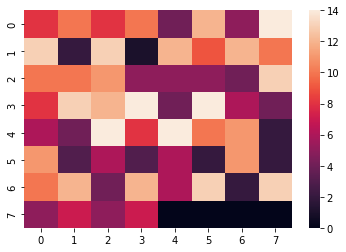

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/5_20x (1).tif


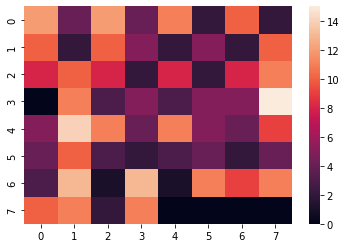

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/9_20x (1).tif


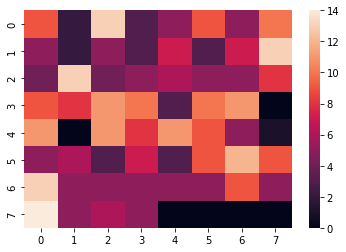

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/8_20x (1).tif


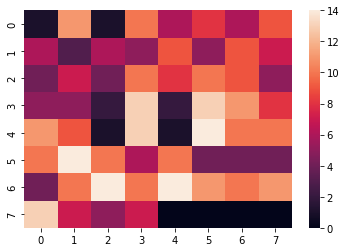

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/1_20x (1).tif


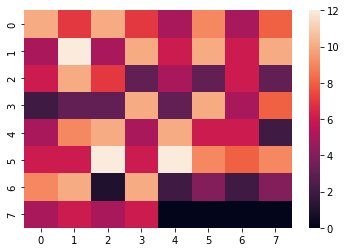

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/7_20x (1).tif


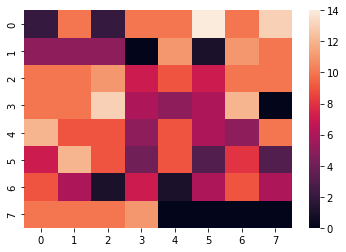

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/10_20x.tif


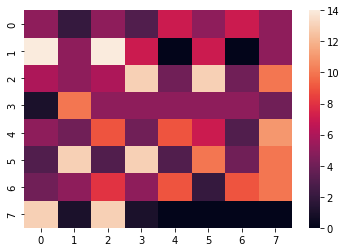

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/3_20x (1).tif


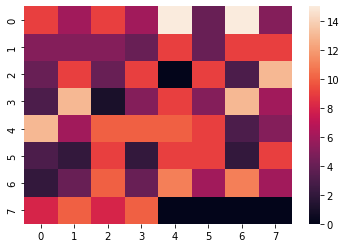

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/6_20x (1).tif


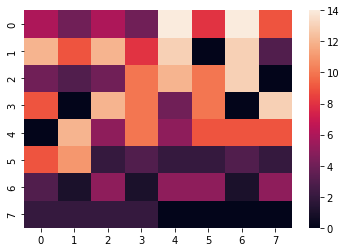

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/2_20x (1).tif


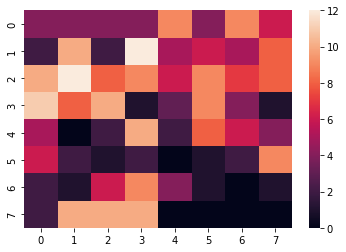

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set2/7_20x.tif


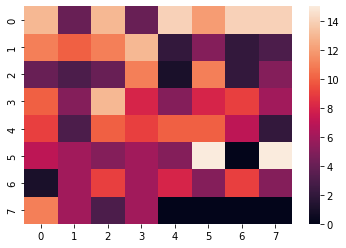

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set2/6_20x.tif


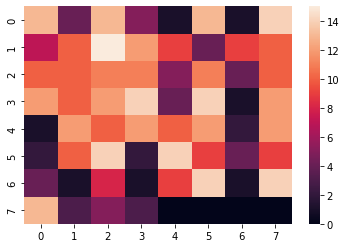

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set2/4_20x.tif


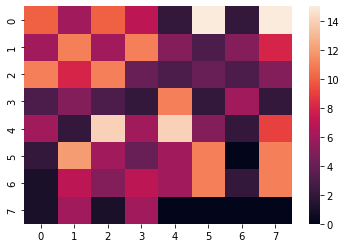

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set2/3_20x.tif


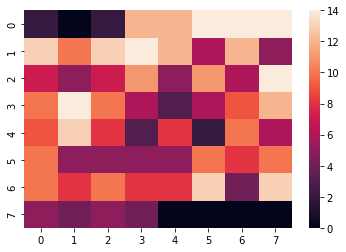

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set2/8_20x.tif


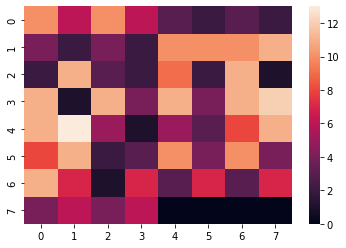

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set2/5_20x.tif


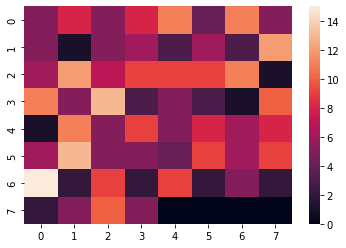

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set2/1_20x.tif


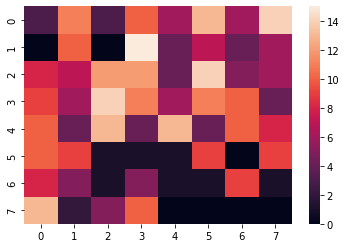

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set2/2_20x.tif


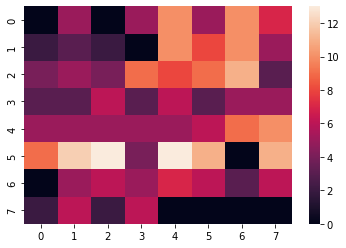

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set2/10_20x.tif


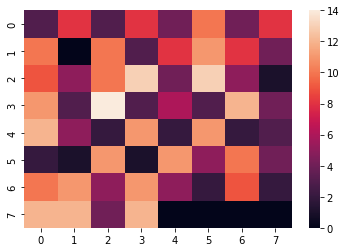

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set2/9_20x.tif


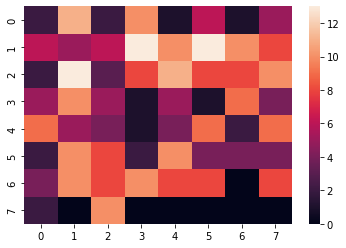

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3/5_20x.tif


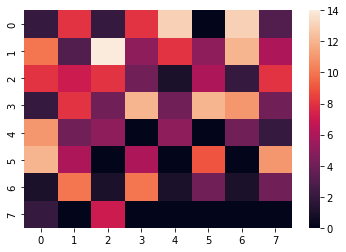

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3/8_20x.tif


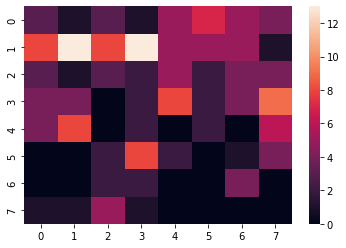

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3/10_20x.tif


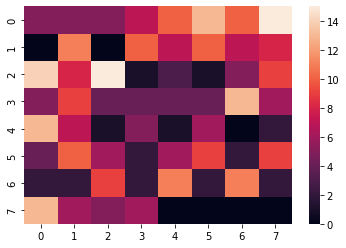

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3/6_20x.tif


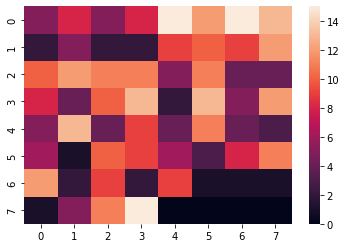

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3/3_20x.tif


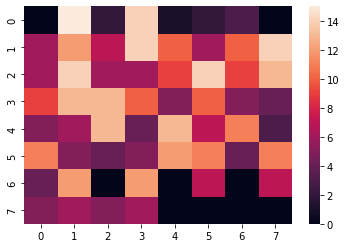

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3/7_20x.tif


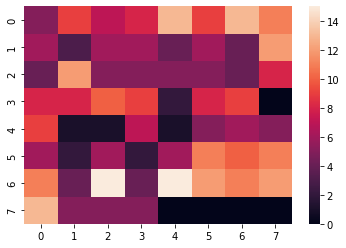

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3/9_20x.tif


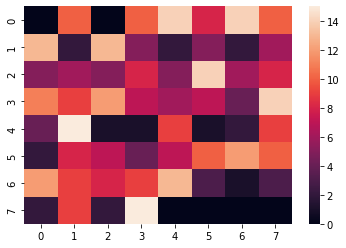

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3/4_20x.tif


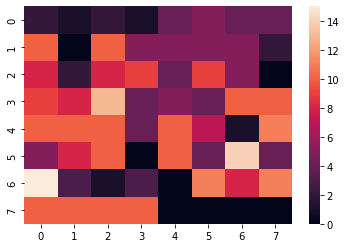

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3/2_20x.tif


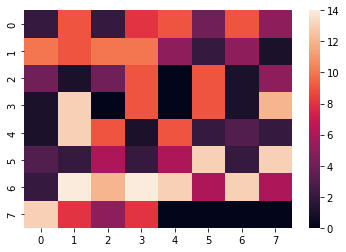

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3/1_20x.tif


Hamming distance heatplot


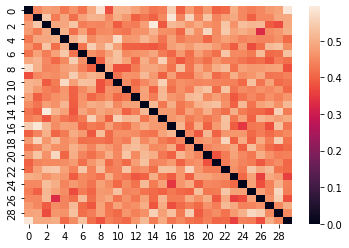

Converted metrics to csv
Converted hashes to csv


In [ ]:
images = add_image_paths_from_directories(directories)
print(images)
normalised = normalize(images)
hashes = compute_hash('dhash', normalised)
evaluation_results = evaluate_metrics('dhash', hashes)
print_results(evaluation_results)
plot_results(evaluation_results, '30puf-normalised')
generate_color_codes(hashes, images, '30puf-normalised', 'dhash')
hamming_heatplot(evaluation_results, '30puf-normalised', len(images))
metrics_csv(evaluation_results, '30puf-normalised')
hash_csv(hashes, '30puf-normalised')

NORMALISED - DAYWISE IMAGES

In [ ]:
# STABILITY FOLDER (daywise comparison)
directory = r'/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Stability'

set1 = []
set2 = []
# reading and storing 2 sets of images
for filename in os.listdir(directory):
  f = os.path.join(directory, filename)
  if os.path.isfile(f):
    if filename == 'Day1.tif':
      set1.append(f)
    else:
      set2.append(f)
set1 = normalize(set1)
set2 = normalize(set2)

Uniformity Average : 0.5013888888888889
Randomness Average : 0.5327617563913518
Uniqueness Average : 0.861111111111111
Uniformity Values : [0.49166666666666664, 0.5083333333333333, 0.4666666666666667, 0.5291666666666667, 0.4708333333333333, 0.5208333333333334, 0.5166666666666667, 0.525, 0.48333333333333334]
Randomness Values : [0.7962534147376393, 0.7962534147376393, 0.30169958247834805, 0.3661565601940605, 0.3661565601940605, 0.5186050164287257, 0.6055766163353464, 0.4385780260809999, 0.6055766163353464]
Hamming Distance Values : [0.0, 0.4609375, 0.296875, 0.41796875, 0.37890625, 0.42578125, 0.453125, 0.46875, 0.4765625, 0.4609375, 0.0, 0.453125, 0.41015625, 0.37109375, 0.41796875, 0.4375, 0.4609375, 0.4296875, 0.296875, 0.453125, 0.0, 0.42578125, 0.38671875, 0.36328125, 0.4609375, 0.4140625, 0.4296875, 0.41796875, 0.41015625, 0.42578125, 0.0, 0.4140625, 0.4609375, 0.49609375, 0.43359375, 0.43359375, 0.37890625, 0.37109375, 0.38671875, 0.4140625, 0.0, 0.390625, 0.52734375, 0.40234375,

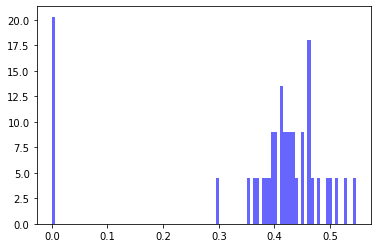



 Color codes


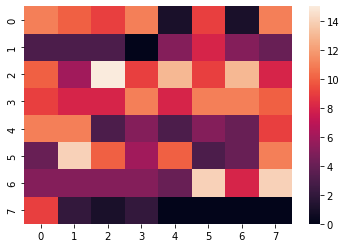

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Stability/Day1.tif


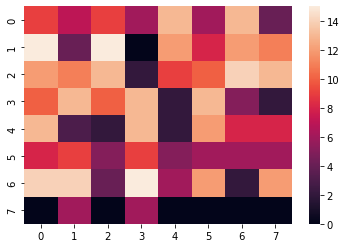

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Stability/Day8.tif


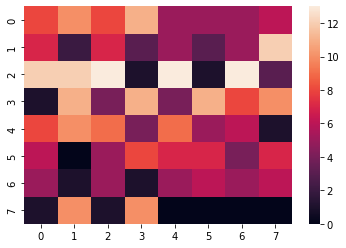

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Stability/Day4.tif


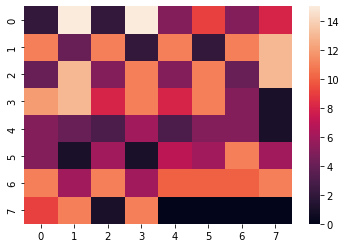

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Stability/Day2.tif


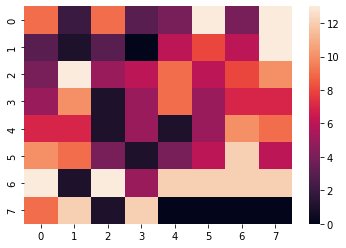

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Stability/Day7.tif


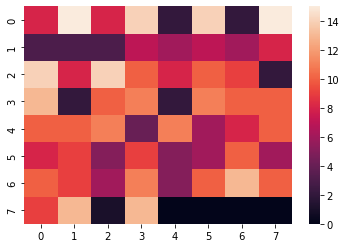

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Stability/Day5.tif


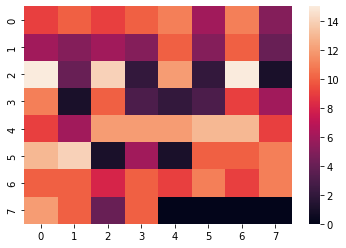

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Stability/Day6.tif


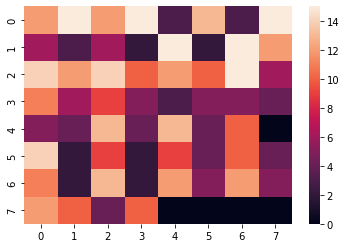

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Stability/Day3.tif


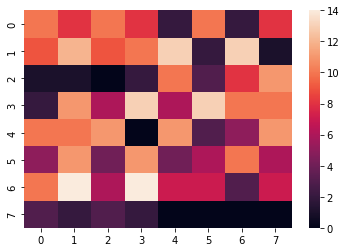

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Stability/Day9.tif


Hamming distance heatplot


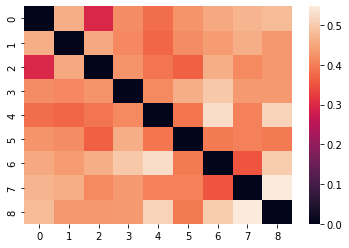

Converted metrics to csv
Converted hash comparison to csv


In [ ]:
hash_results = compare_hash_sets(set1, set2, 'dhash', 16, 'Normalised Daywise')
normalised = normalize(images)
evaluation_results = evaluate_metrics('dhash', hash_results['Hashes'])
print_results(evaluation_results)
plot_results(evaluation_results, 'Normalised Daywise')
images = add_image_paths_from_directory('/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Stability')
generate_color_codes(hash_results['Hashes'], images, 'Normalised Daywise', 'dhash')
hamming_heatplot(evaluation_results, 'Normalised Daywise', len(images))
metrics_csv(evaluation_results, 'Normalised Daywise')
hash_comp_csv(hash_results, 'Normalised Daywise')

In [ ]:
## NIST DATASET TEST

In [ ]:
!git clone https://github.com/stevenang/randomness_testsuite.git

Cloning into 'randomness_testsuite'...
remote: Enumerating objects: 129, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 129 (delta 10), reused 4 (delta 2), pack-reused 109
Receiving objects: 100% (129/129), 897.02 KiB | 5.21 MiB/s, done.
Resolving deltas: 100% (59/59), done.


In [ ]:
%cd randomness_testsuite/

/content/randomness_testsuite


In [ ]:
from FrequencyTest import FrequencyTest
from RunTest import RunTest
from Matrix import Matrix
from Spectral import SpectralTest
from TemplateMatching import TemplateMatching
from Universal import Universal
from Complexity import ComplexityTest
from Serial import Serial
from ApproximateEntropy import ApproximateEntropy
from CumulativeSum import CumulativeSums
from RandomExcursions import RandomExcursions

def randomness_tests(hashes,images):
  test1=0
  test2=0
  test3=0
  test4=0
  test5=0
  test6=0
  test7=0
  test8=0
  failed1 = []
  failed2 = []
  failed3 = []
  for i in range(len(hashes)):
    print("Image", images[i])
    print("Tests on each hash", hashes[i])
    print('The statistical test of the Binary Expansion of', hashes[i])
    if(FrequencyTest.monobit_test(hashes[i])[1] == True):
      test1 = test1+1
    else:
      failed1.append(i)
    if(FrequencyTest.block_frequency(hashes[i])[1] == True):
      test2 = test2+1
    else:
      failed2.append(i)
    if(RunTest.run_test(hashes[i])[1] == True):
      test3 = test3+1
    if(RunTest.longest_one_block_test(hashes[i])[1] == True):
      test4 = test4+1
    if(Serial.serial_test(hashes[i])[1] == True):
      test5 = test5+1
    if(ApproximateEntropy.approximate_entropy_test(hashes[i])[1] == True):
      test6 = test6+1
    if(CumulativeSums.cumulative_sums_test(hashes[i], 0)[1] == True):
      test7 = test7+1
    if(CumulativeSums.cumulative_sums_test(hashes[i], 1)[1] == True):
      test8 = test8+1
    print('1. Frequency Test:\t\t\t\t\t\t\t\t', FrequencyTest.monobit_test(hashes[i]))
    print('2. Block Frequency Test:\t\t\t\t\t\t\t', FrequencyTest.block_frequency(hashes[i]))
    print('3. Run Test:\t\t\t\t\t\t\t\t\t\t', RunTest.run_test(hashes[i]))
    print('4. Run Test (Longest Run of Ones): \t\t\t\t', RunTest.longest_one_block_test(hashes[i]))
    print('5. Serial Test:\t\t\t\t\t\t\t\t\t', Serial.serial_test(hashes[i]))
    print('6. Approximate Entropy Test:\t\t\t\t\t\t', ApproximateEntropy.approximate_entropy_test(hashes[i]))
    print('7. Cumulative Sums (Forward):\t\t\t\t\t', CumulativeSums.cumulative_sums_test(hashes[i], 0))
    print('8. Cumulative Sums (Backward):\t\t\t\t\t', CumulativeSums.cumulative_sums_test(hashes[i], 1))
    print("*"*200)
  print("Test results: ")
  print("1. Frequency Test:",test1)
  print("2. Block Frequency Test:",test2)
  print("3. Run Test:",test3)
  print("4. Run Test (Longest Run of Ones): ",test4)
  print("5. Serial Test:",test5)
  print("6. Approximate Entropy Test:",test6)
  print("7. Cumulative Sums (Forward):",test7)
  print("8. Cumulative Sums (Backward):",test8)
  print("Failed1", failed1)
  print("Failed2", failed2)

In [ ]:
images = add_image_paths_from_directory('/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Images for randomness')
print(images)
gs_images = grayscale_images(images)
hashes = compute_hash('dhash', gs_images)
randomness_tests(hashes,images)

['/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Images for randomness/b_day2.tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Images for randomness/c_day4.tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Images for randomness/a_day5.tif']
Image /content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Images for randomness/b_day2.tif
Tests on each hash 110010101100110001001010111010110010010110110101000101001110010100011001110010101101101010101011101010010101010101010001010010010010001010011010001010001101100000011010001110100110001001100100111001011001011001010001010100011110011100001100
The statistical test of the Binary Expansion of 110010101100110001001010111010110010010110110101000101001110010100011001110010101101101010101011101010010101010101010001010010010010001010011010001010001101100000011010001110100110001001100100111001011001011001010001010100011110011100001100
1. Frequency Te

In [ ]:
directories = [r'/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1',
               r'/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set2',
               r'/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3']
images = add_image_paths_from_directories(directories)
print(images)
gs_images = grayscale_images(images)
hashes = compute_hash('dhash', gs_images)
randomness_tests(hashes,images)

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1
/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set2
/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3
['/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/4_20x (1).tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/5_20x (1).tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/9_20x (1).tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/8_20x (1).tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/1_20x (1).tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/7_20x (1).tif', '/content/gdrive/MyDrive/Tyrosine-SA

In [ ]:
failed1 = [10, 19, 20, 21, 22]
failed2 = [10, 19, 20, 21]
for i in range(len(failed1)):
  print(images[failed1[i]])

/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set2/7_20x.tif
/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set2/9_20x.tif
/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3/5_20x.tif
/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3/8_20x.tif
/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set3/20x_3/10_20x.tif


IMAGE RANDOMNESS

In [5]:
import numpy as np
from PIL import Image

IMAGES = ['/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/4_20x (1).tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/5_20x (1).tif', '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/9_20x (1).tif',
          '/content/black1.png',
          '/content/black2.jpg',
          '/content/black3.png',
          '/content/blue.png',
          '/content/blue2.png',
          '/content/blue3.png',
          '/content/white1.png',
          '/content/white2.png',
          '/content/white3.jpg']

In [14]:
from PIL import Image
import math

for image in IMAGES:
  # Open the TIFF image
  img = Image.open(image)

  # Convert the image to grayscale
  img = img.convert('L')
  # Calculate the histogram of the image
  hist = img.histogram()

  # Calculate the probability of each pixel value
  pixels = sum(hist)
  probs = [float(h) / pixels for h in hist]

  # Calculate the entropy of the image
  entropy = - round(sum([p * math.log(p, 2) for p in probs if p != 0]),4)


  # Calculate maximum entropy
  N = 256 # number of possible pixel values for an 8-bit grayscale image
  ent_max = np.log2(N)

  # Calculate entropy ratio
  if ent_max!=0:
    ent_ratio = round(entropy / ent_max,4)
  
  print(entropy)

5.1945
5.0664
5.1646
0.6626
1.761
-0.0
0.7617
-0.0
-0.0
0.5012
-0.0
1.6774


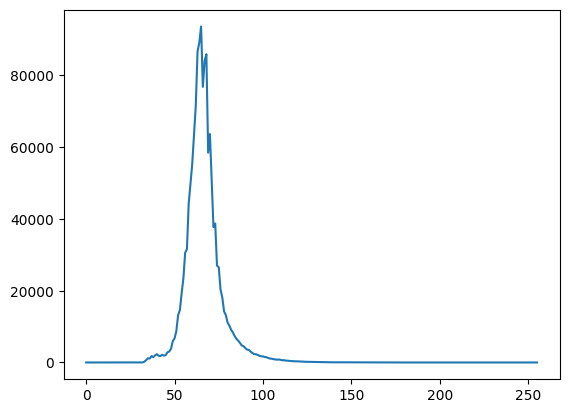

In [ ]:
# importing required libraries of opencv
import cv2
  
# importing library for plotting
from matplotlib import pyplot as plt
  
# reads an input image
img = cv2.imread('/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /30 PUF Images/20x_Set1/4_20x (1).tif',0)
  
# find frequency of pixels in range 0-255
histr = cv2.calcHist([img],[0],None,[256],[0,256])
  
# show the plotting graph of an image
plt.plot(histr)
plt.show()

In [17]:
import statistics 

data = [[5.1945, 5.0664, 5.1646], [0.6626, 1.761, 0.0], [0.7617, 0.0, 0.0], [0.5012, 0.0, 1.6774]]
for d in data:
  print("Standard Deviation of the sample",d,"is % s "% (round(statistics.stdev(d),4)))
  print("Mean of the sample is % s " % (round(statistics.mean(d),4)))

Standard Deviation of the sample [5.1945, 5.0664, 5.1646] is 0.067 
Mean of the sample is 5.1418 
Standard Deviation of the sample [0.6626, 1.761, 0.0] is 0.8894 
Mean of the sample is 0.8079 
Standard Deviation of the sample [0.7617, 0.0, 0.0] is 0.4398 
Mean of the sample is 0.2539 
Standard Deviation of the sample [0.5012, 0.0, 1.6774] is 0.861 
Mean of the sample is 0.7262 


In [ ]:
img = '/content/gdrive/MyDrive/Tyrosine-SA-Hydrogel_Optical microscope images /Stability/Day1.tif'
entropy = skimage.measure.shannon_entropy(img)
print(entropy)

0.0


In [ ]:
"************************* END *****************************"

'************************* END *****************************'